#MACHINE   LEARNING   PROJECT   FOR   STUDENTS   DEPPRESSION   PREDICTION

#Problem Statement

Many students face depression, but early detection is hard. This project aims to build a model that identifies depression risk from student data to help provide timely support.

#Objective

To predict student depression using machine learning based on academic, social, and personal data.



---



# S SIVA,3rd Year, B.Tech(AI & DS)



**IMPORT NECESSARY LIBRARIES**

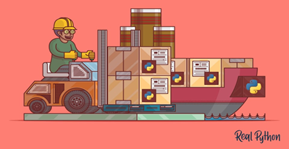

In [ ]:
#Import neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
#MODEL SELECTION
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#MODEL EVALUATION
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,classification_report

Step 2: Load Data

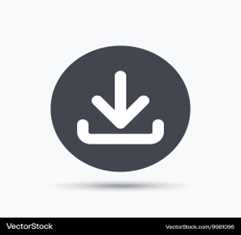

In [ ]:
#Load Data set
data=pd.read_csv("/content/archive (4).zip")
data.head(3)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0


Step 3: Converting to Data Frame

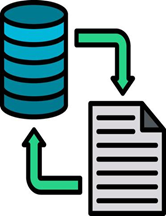

In [ ]:
#Converting to Data Frame
df=pd.DataFrame(data)
df.head(3)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0


In [ ]:
#Information about Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
#Shape of the Data Set
df.shape

(27901, 18)

In [ ]:
#Columns of Data Set
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
#Describe Data Set
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


Step 4: Handling Missing Values


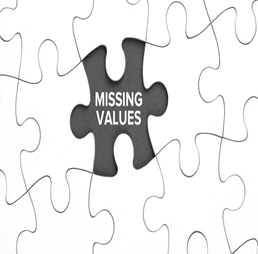

In [ ]:
#Finding missing values
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
# Replace '?'
df.replace('?', 0, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')
df.to_csv('updated_data.csv', index=False)
print(df)

<ipython-input-30-6395f5127940>:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


           id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0                0.

Step 5: Handling Duplicates


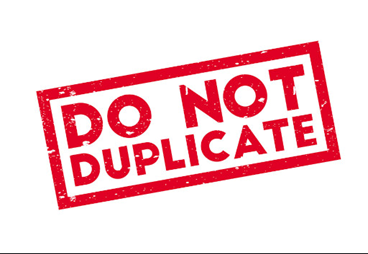

In [ ]:
#Finding duplicates
df.duplicated().sum()

np.int64(0)

#Step 6: Encoding

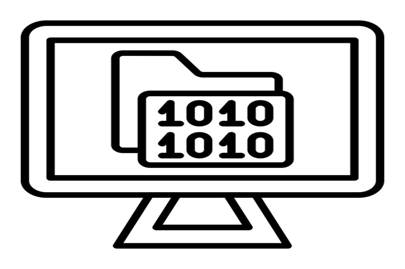

In [ ]:
#Assining independent variables to x and target variable to y
x=df.drop('Depression',axis=1)
y=df['Depression']
print(x.columns)
print(y)

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness'],
      dtype='object')
0        1
1        0
2        0
3        1
4        0
        ..
27896    0
27897    0
27898    0
27899    1
27900    1
Name: Depression, Length: 27901, dtype: int64


In [ ]:
# Encoding the independent variable (x), there is no need of encoding  y. beacuse y also in a numerical column.
oh = OneHotEncoder(sparse_output=False)
Gender_reshape=x['Gender'].values.reshape(-1, 1)
e_Gender=oh.fit_transform(Gender_reshape)
encoded_Gender= pd.DataFrame(e_Gender, columns=oh.categories_[0], dtype=int)
encoded_Gender



,Female,Male
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
27896,1,0
27897,0,1
27898,0,1
27899,1,0


In [ ]:
#One Hot Encoding  for all categorical columns or instances except int and float columns
encoded=oh.fit_transform(x[['Gender','City','Profession','Sleep Duration','Dietary Habits','Degree','Have you ever had suicidal thoughts ?','Financial Stress','Family History of Mental Illness']])
encoded_df=pd.DataFrame(encoded, columns=oh.get_feature_names_out())
encoded_df

,Gender_Female,Gender_Male,City_'Less Delhi',City_'Less than 5 Kalyan',City_3.0,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,...,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Financial Stress_0.0,Financial Stress_1.0,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Family History of Mental Illness_No,Family History of Mental Illness_Yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27897,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27898,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
27899,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
#concat encoded columns with int and float columns
remaining_x=df[['id','Age','Academic Pressure','Work Pressure','CGPA','Study Satisfaction','Job Satisfaction','Work/Study Hours','Financial Stress']]
df1=pd.concat([remaining_x,encoded_df],axis=1)
df1

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender_Female,...,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Financial Stress_0.0,Financial Stress_1.0,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Family History of Mental Illness_No,Family History of Mental Illness_Yes
0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27897,140686,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27898,140689,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
27899,140690,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


df1 --> Ageter encoding

#Step 7: Handling outlier's


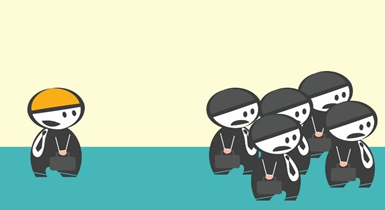

Text(0.5, 1.0, 'Box plot for Age')

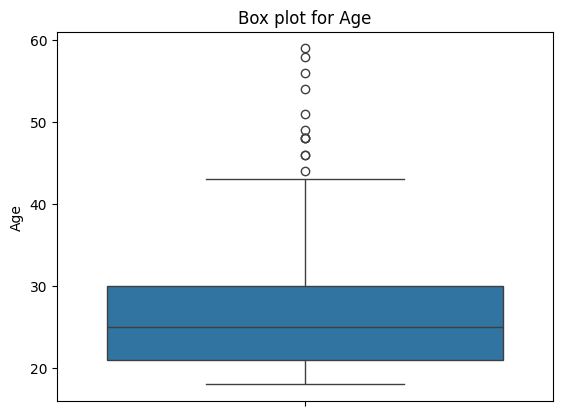

In [ ]:
#Finding outlier's using Box plot for Age
sns.boxplot(df1['Age'])
plt.title("Box plot for Age")

In [ ]:
#Finding lower bound and upper bound
q1=df1['Age'].quantile(0.25)
q3=df1['Age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
print("First quartile:",q1)
print("Third quartile:",q3)
print("Inter Quartile Range:",iqr)
print("Lower bound:",lower_bound)
print("Upper bound:",upper_bound)

First quartile: 21.0
Third quartile: 30.0
Inter Quartile Range: 9.0
Lower bound: 7.5
Upper bound: 43.5


In [ ]:
#Removing outliers based on Age column (lower and uppper bound)
df2=df1[(df1['Age']>=lower_bound) & (df1['Age']<=upper_bound)]
print("Filtered Data:")
df2

Filtered Data:


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender_Female,...,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Financial Stress_0.0,Financial Stress_1.0,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Family History of Mental Illness_No,Family History of Mental Illness_Yes
0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27897,140686,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
27898,140689,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
27899,140690,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Now there is no outliers on Age column



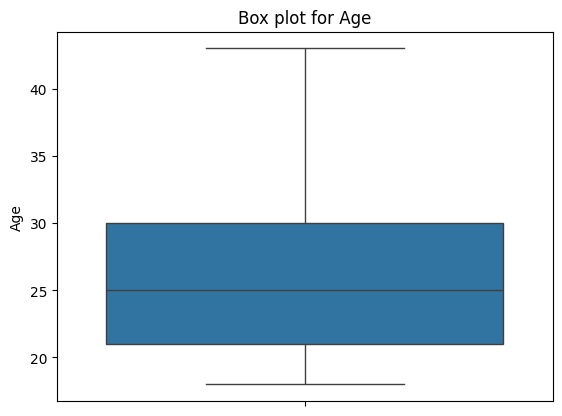

In [ ]:
#Box plot for Age column after removing outliers
sns.boxplot(df2['Age'])
plt.title("Box plot for Age")
print("Now there is no outliers on Age column")
print()

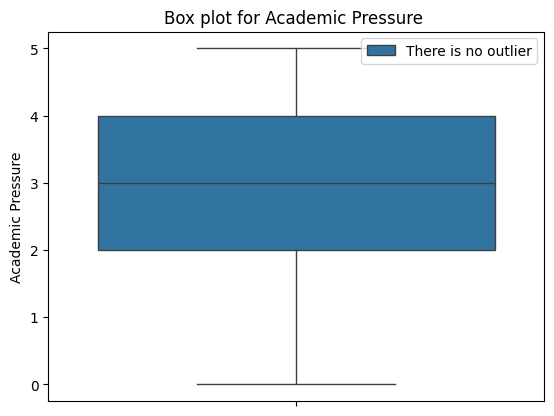

In [ ]:
#Finding outlier's using Box plot for Academic Pressure
sns.boxplot(df2['Academic Pressure'],label='There is no outlier')
plt.title("Box plot for Academic Pressure ")
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Box plot for CGPA ')

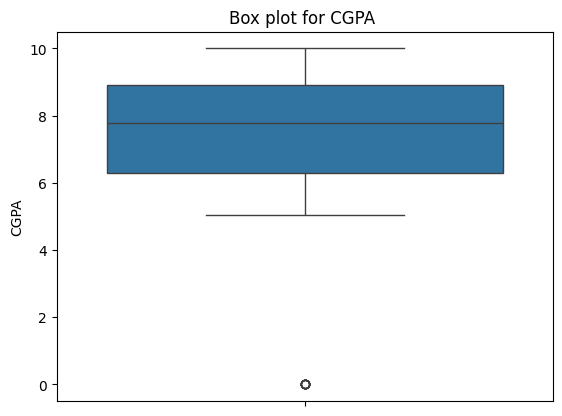

In [ ]:
#Finding outlier's using Box plot for CGPA
sns.boxplot(df2['CGPA'])
plt.title("Box plot for CGPA ")

# According to above plot, I don't need to remove outlier's, because students have depression based on our mark or CGPA  

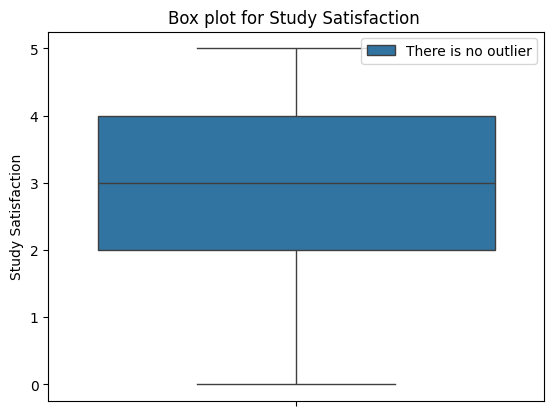

In [ ]:
#Finding outlier's using Box plot for Study Satisfaction
sns.boxplot(df2['Study Satisfaction'],label='There is no outlier')
plt.title("Box plot for Study Satisfaction ")
plt.legend(loc='upper right')

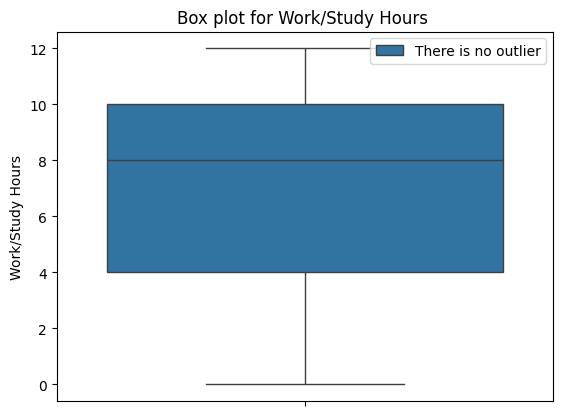

In [ ]:
#Finding outlier's using Box plot for Work/Study Hours
sns.boxplot(df2['Work/Study Hours'],label='There is no outlier')
plt.title("Box plot for Work/Study Hours ")
plt.legend(loc='upper right')

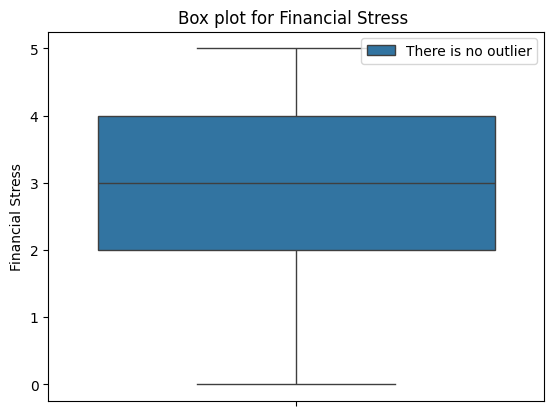

In [ ]:
#Finding outlier's using Box plot for Financial Stress
sns.boxplot(df2['Financial Stress'],label='There is no outlier')
plt.title("Box plot for Financial Stress ")
plt.legend(loc='upper right')

#Step 8:Creating different Plots

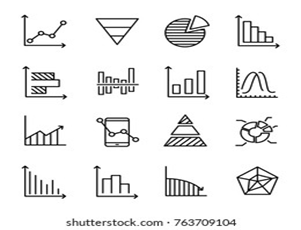

<Axes: >

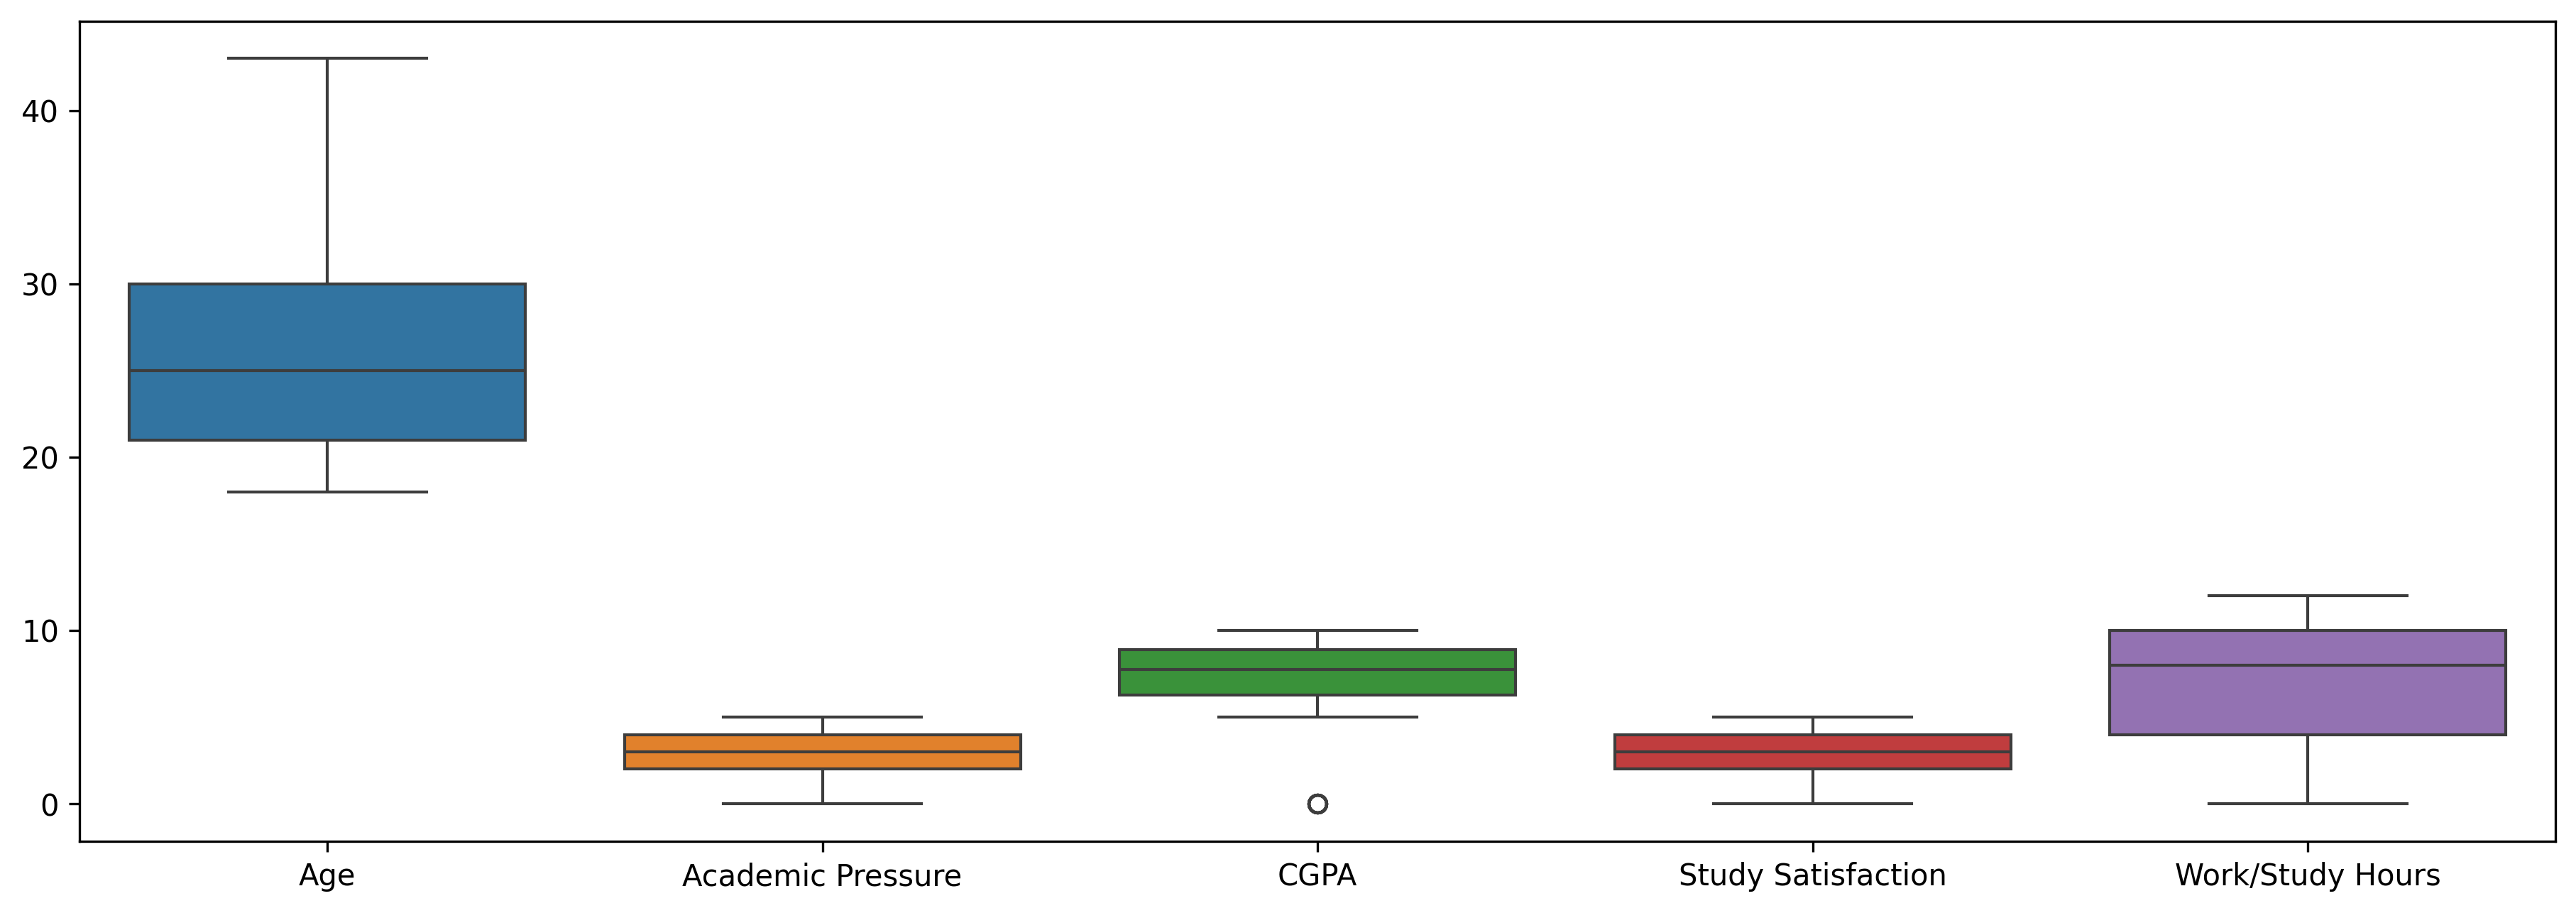

In [ ]:
#Box plot for nemerical coulmns on independent(x) variables
lst=df2[['Age','Academic Pressure','CGPA','Study Satisfaction','Work/Study Hours']]
plt.figure(figsize=(15,5),dpi=300)
sns.boxplot(lst)

<ipython-input-46-c497ad091254>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_list[col] = pd.to_numeric(new_list[col].replace('?', np.nan))


<Axes: >

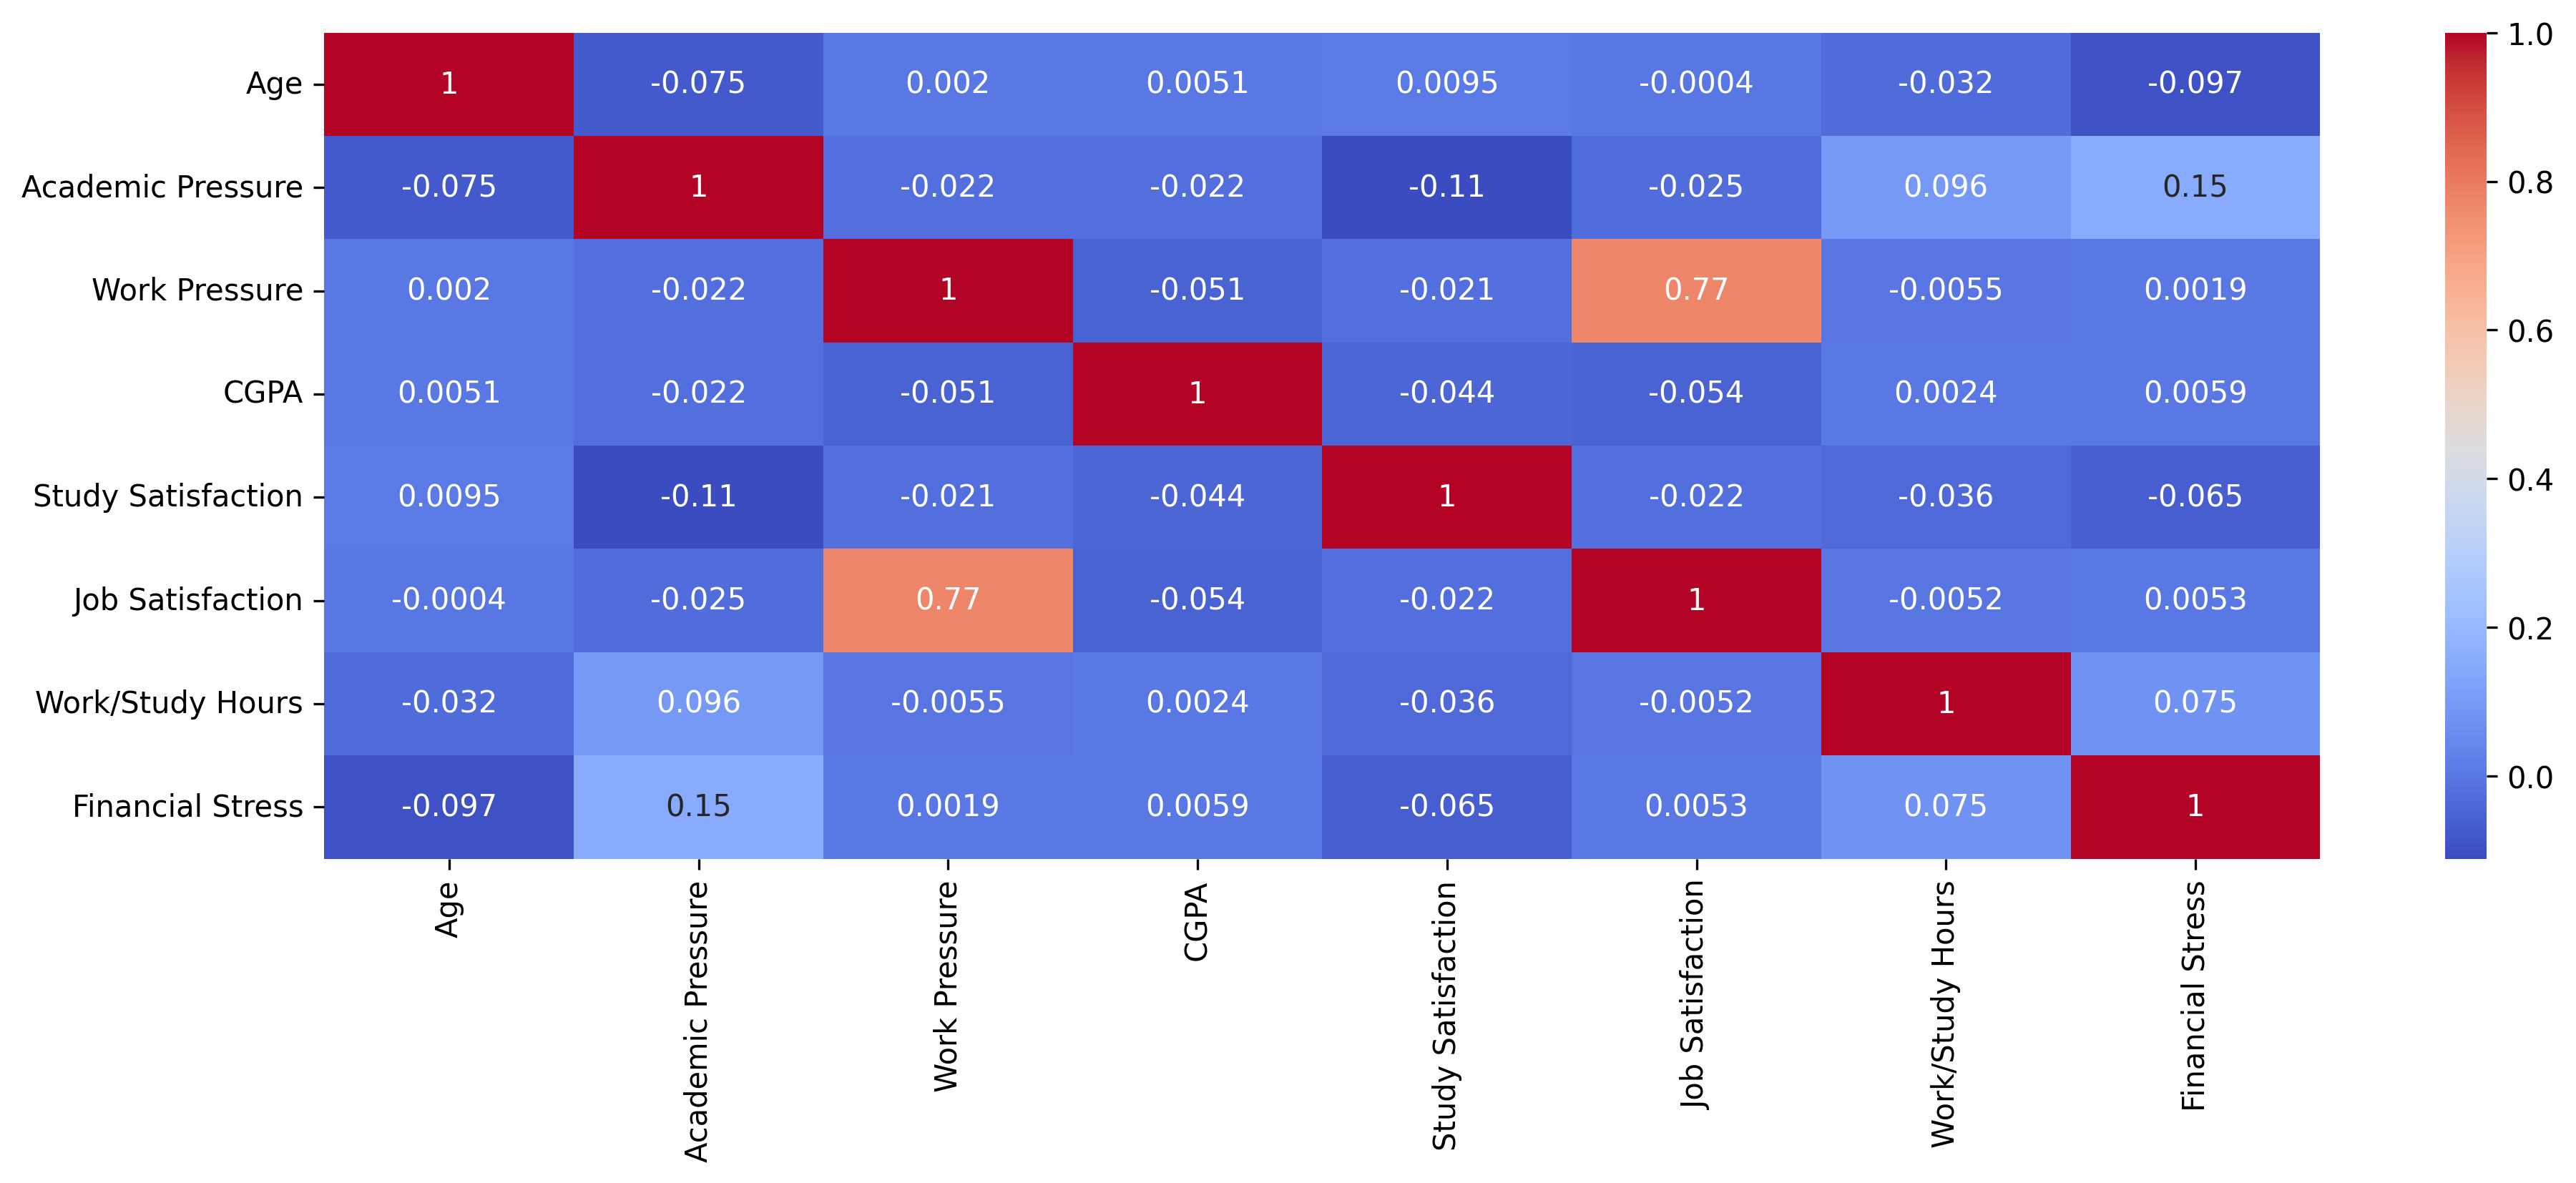

In [ ]:
#Heat map for x(numeric) variables
new_list=df2[['Age','Academic Pressure','Work Pressure','CGPA','Study Satisfaction','Job Satisfaction','Work/Study Hours','Financial Stress']]
plt.figure(figsize=(15,5),dpi=300)
for col in new_list.columns:
    new_list[col] = pd.to_numeric(new_list[col].replace('?', np.nan))
c=new_list.corr()
sns.heatmap(c,annot=True,cmap='coolwarm')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
n = df2[['Age', 'Academic Pressure','Work Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours','Job Satisfaction','Financial Stress']]

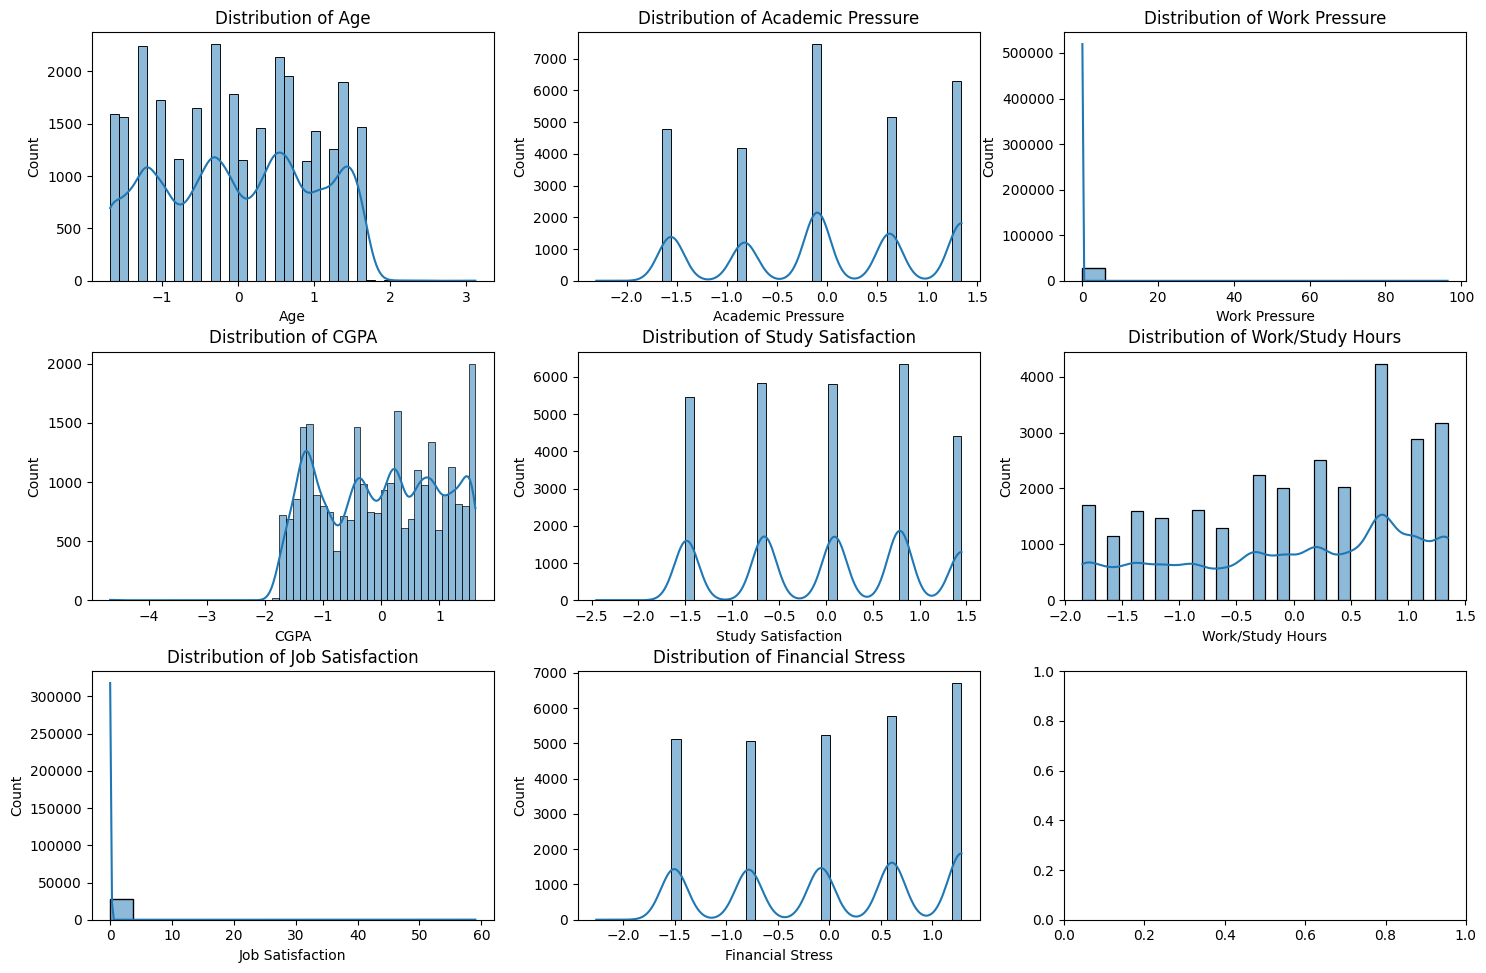

In [ ]:
#Creating KDE Plot using Histogram
fix,ax= plt.subplots(3, 3,figsize=(15,10))
fix.tight_layout(pad=3.0)
for i, col in enumerate(n):
    row = i // 3
    col_num = i % 3
    sns.histplot(df2[col], kde=True, ax=ax[row, col_num])
    ax[row, col_num].set_title(f'Distribution of {col}')

plt.show()

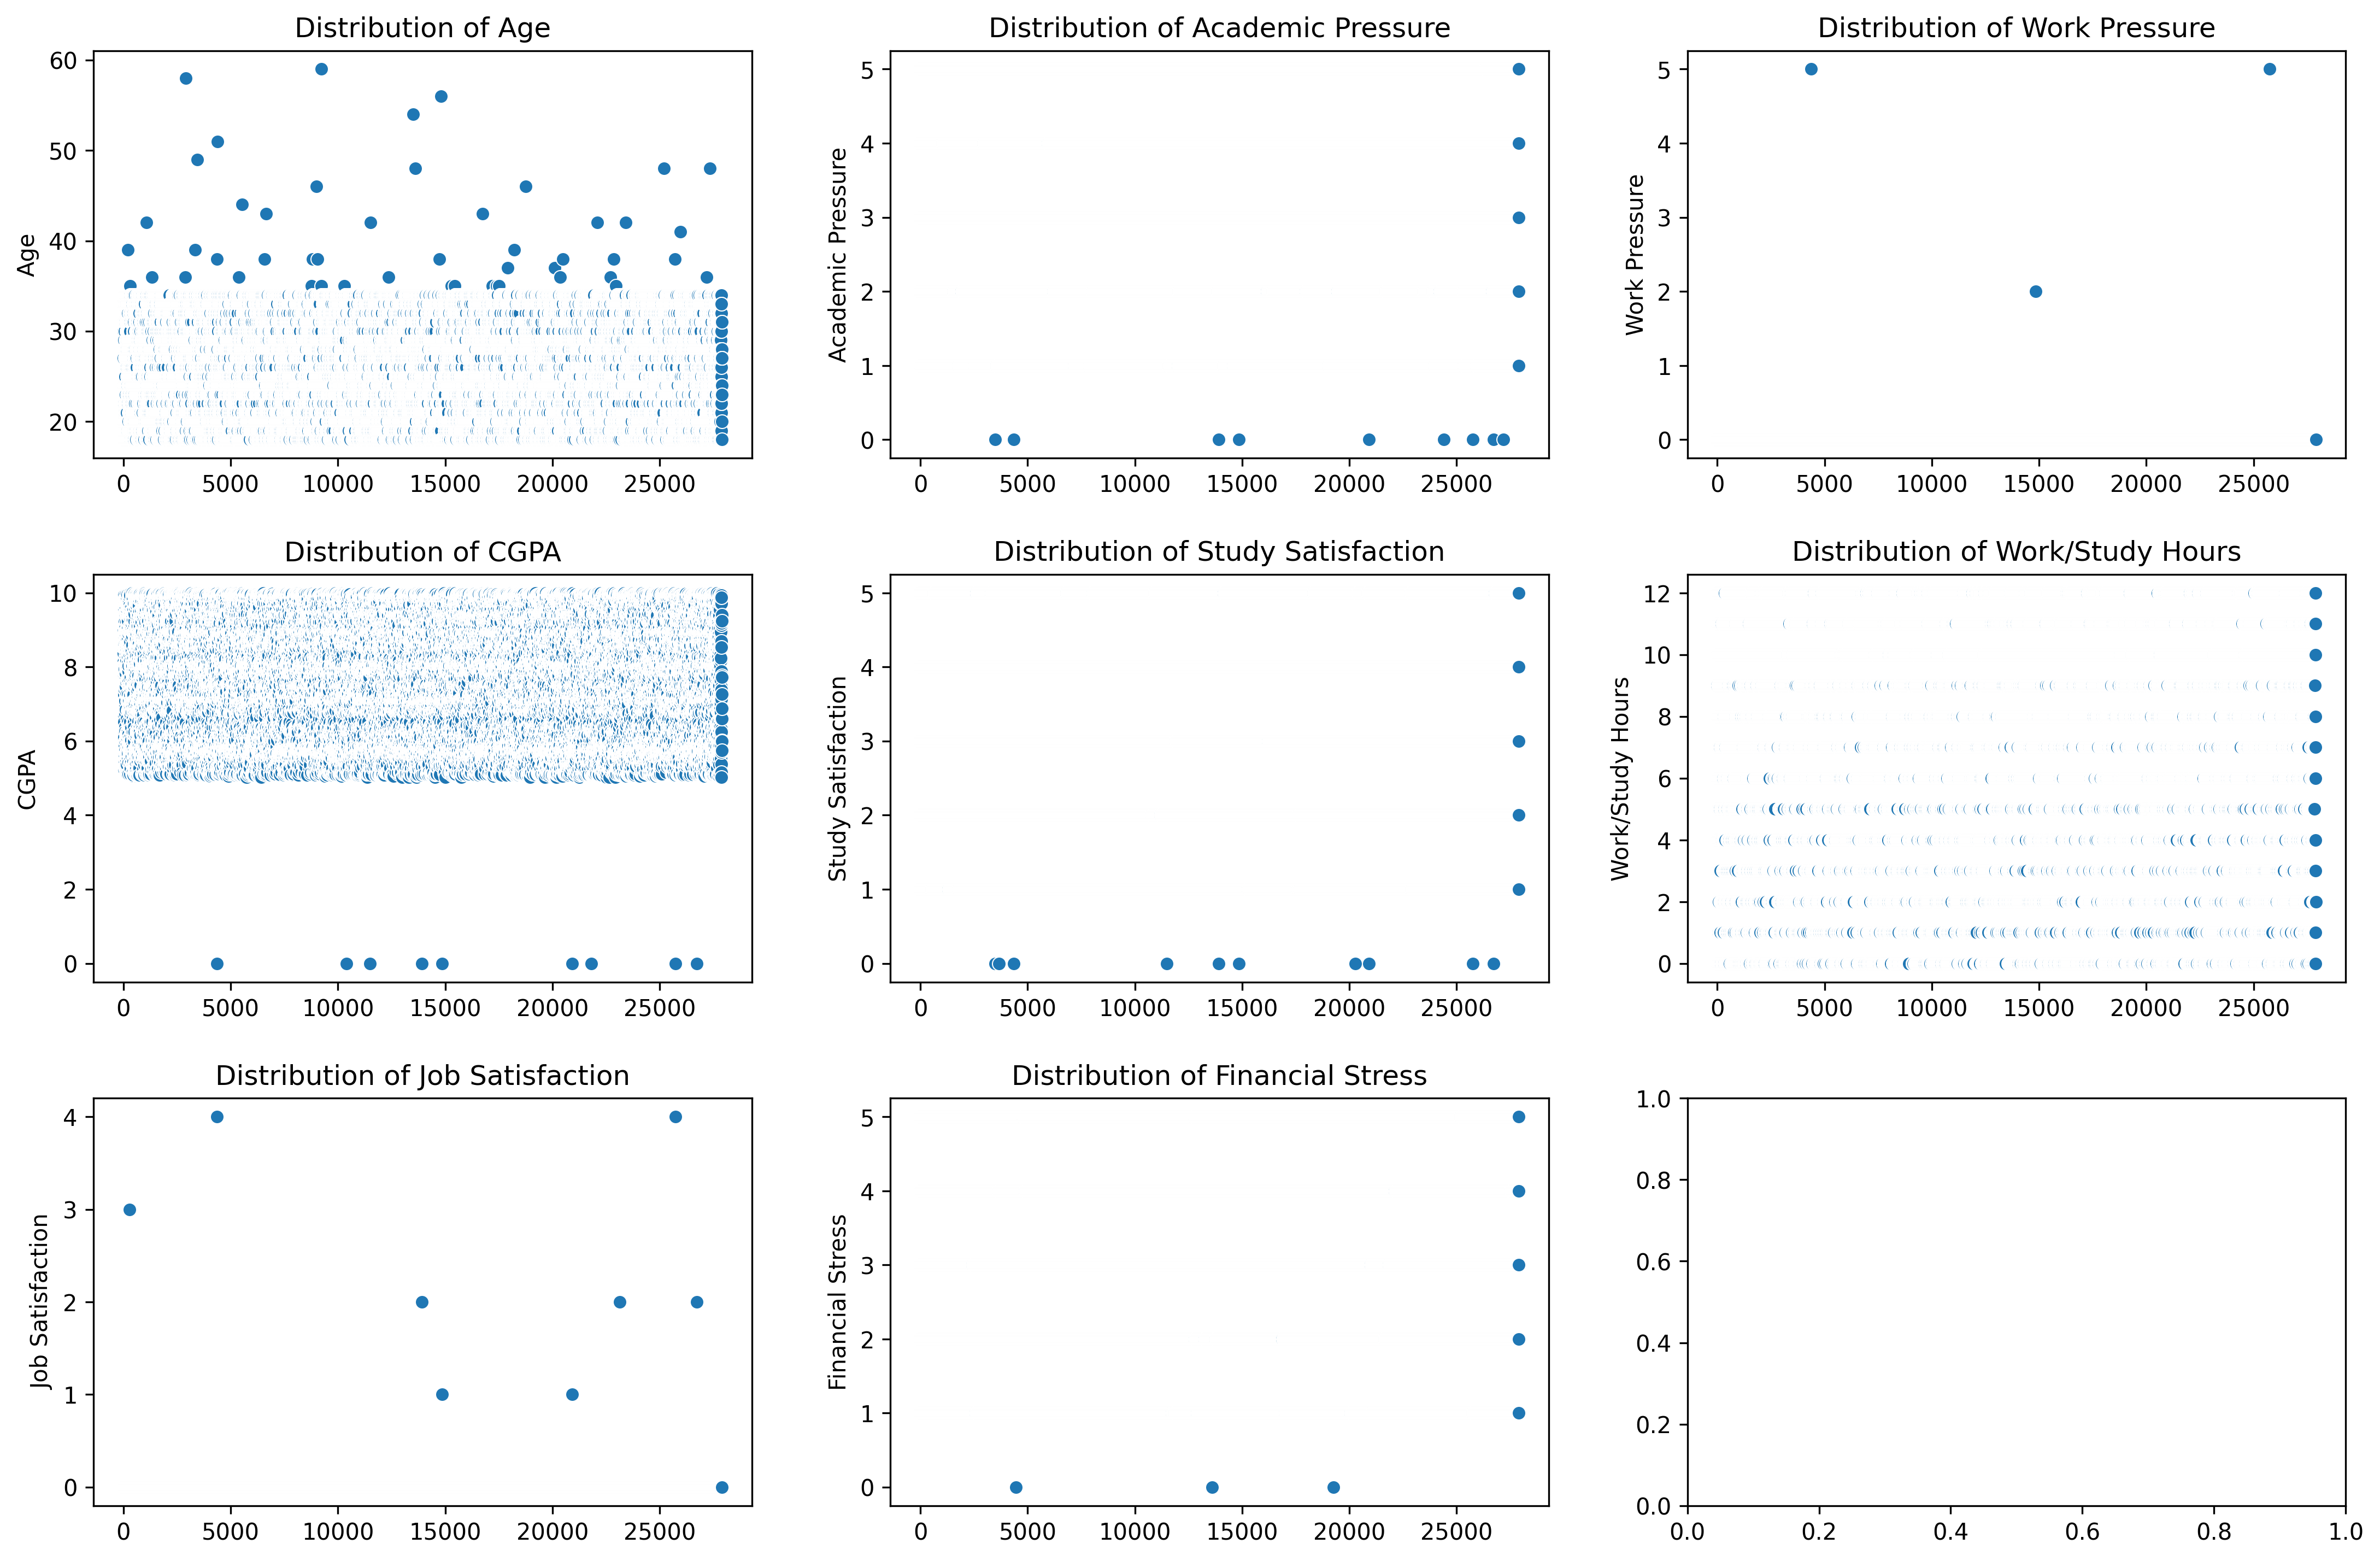

In [ ]:
#Scatter Plot
fix,ax= plt.subplots(3, 3,figsize=(15,10),dpi=300)
fix.tight_layout(pad=3.0)
for i, col in enumerate(n):
    row = i // 3
    col_num = i % 3
    sns.scatterplot(df[col], ax=ax[row, col_num])
    ax[row, col_num].set_title(f'Distribution of {col}')
plt.show()

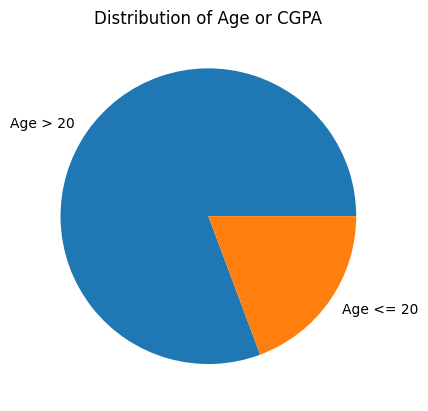

In [ ]:
#creating pie chart
age_above_20 = df2[df2['Age'] > 20]['Age'].count()
age_below_20 = df2[df2['Age'] <= 20]['Age'].count()
cgpa_above_7 = df2[df2['CGPA'] > 7]['CGPA'].count()
cgpa_below_7 = df2[df2['CGPA'] <= 7]['CGPA'].count()

sizes = [age_above_20, age_below_20]
labels = ['Age > 20', 'Age <= 20']

plt.pie(sizes, labels=labels)
plt.title('Distribution of Age or CGPA')
plt.show()

#Step 9: SKEW

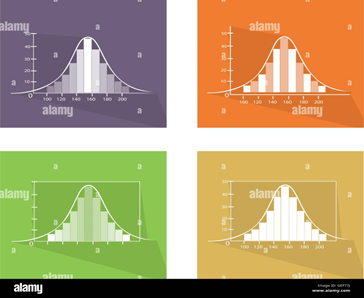

In [ ]:
df2.skew()

,0
id,-0.005623
Age,0.078281
Academic Pressure,-0.135367
Work Pressure,108.571002
CGPA,-0.113092
...,...
Financial Stress_3.0,1.602933
Financial Stress_4.0,1.447251
Financial Stress_5.0,1.213343
Family History of Mental Illness_No,-0.064363


In [ ]:
#Removing skew sing 'Power Transformer'
from sklearn.preprocessing import PowerTransformer
cols_to_transform = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
pt = PowerTransformer(method="yeo-johnson")
df2[cols_to_transform] = pt.fit_transform(df2[cols_to_transform])
df2.skew()

<ipython-input-53-c975ec8a4cda>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[cols_to_transform] = pt.fit_transform(df2[cols_to_transform])


,0
id,-0.005623
Age,-0.036298
Academic Pressure,-0.148351
Work Pressure,96.407122
CGPA,-0.068255
...,...
Financial Stress_3.0,1.602933
Financial Stress_4.0,1.447251
Financial Stress_5.0,1.213343
Family History of Mental Illness_No,-0.064363


# Step 10: Feature Selection

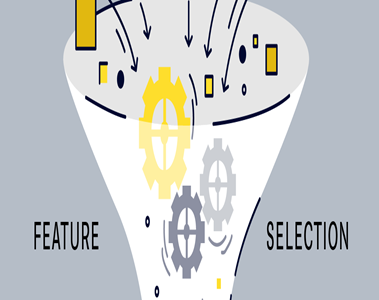

In [ ]:
#Feature selection
from sklearn.feature_selection import SelectKBest,chi2,f_classif
x = df1
y = y
selecter=SelectKBest(score_func=f_classif,k=20)
x_new=selecter.fit_transform(x,y)
selected_features=x.columns[selecter.get_support()]
feature_score=pd.DataFrame({'Feature':x.columns,'Score':selecter.scores_}).sort_values(by='Score',ascending=False)
if (feature_score['Score'] > 50).any():
  print(feature_score[feature_score['Score'] > 50])

                                       Feature         Score
114   Have you ever had suicidal thoughts ?_No  11866.855671
115  Have you ever had suicidal thoughts ?_Yes  11866.855671
2                            Academic Pressure   8121.471807
8                             Financial Stress   4250.171820
121                       Financial Stress_5.0   2018.862972
117                       Financial Stress_1.0   1969.568108
1                                          Age   1507.585682
7                             Work/Study Hours   1268.752140
85                    Dietary Habits_Unhealthy   1037.493747
5                           Study Satisfaction    810.006999
82                      Dietary Habits_Healthy    772.709388
118                       Financial Stress_2.0    631.848967
86                           Degree_'Class 12'    486.907455
120                       Financial Stress_4.0    337.422114
80          Sleep Duration_'More than 8 hours'    185.971317
79          Sleep Durati

SPLIT  X and Y. SELECT FEATURES FOR X BASED ON FEATURE SCORE

In [ ]:
selected_features = feature_score[feature_score['Score'] > 50]['Feature'].tolist()
x = df1[selected_features]

Split the data into train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Step 11: SCALING

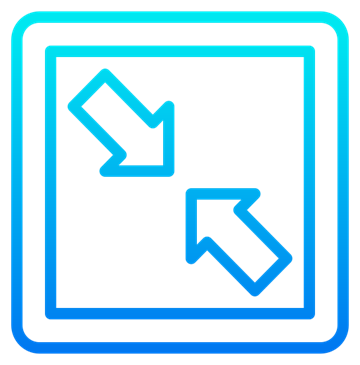

In [ ]:
x_test_scaled=StandardScaler().fit_transform(x_test)
x_train_scaled=StandardScaler().fit_transform(x_train)

In [ ]:
classifiers={'Logistic Regression':LogisticRegression(),'Decision Tree':DecisionTreeClassifier(),'Random Forest':RandomForestClassifier(),'SVM':SVC()}

#Step 12: Taining, testing and prediction


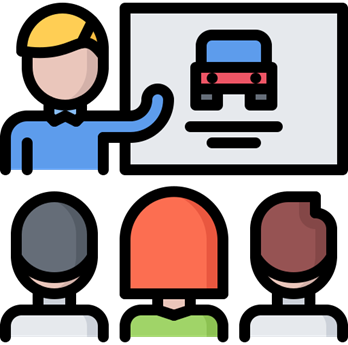

In [ ]:
for name, classifier in classifiers.items():
  classifier.fit(x_train_scaled,y_train)
  y_pred = classifier.predict(x_test_scaled)
  print(f"\n {name} Results:")
  print("Accuracy:",accuracy_score(y_test,y_pred))
  print("\nConfution Matrix:")
  print(confusion_matrix(y_test,y_pred))
  print("\nClassification Report:")
  print(classification_report(y_test,y_pred))


 Logistic Regression Results:
Accuracy: 0.8402819256958547

Confution Matrix:
[[2736  769]
 [ 568 4298]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      3505
           1       0.85      0.88      0.87      4866

    accuracy                           0.84      8371
   macro avg       0.84      0.83      0.83      8371
weighted avg       0.84      0.84      0.84      8371


 Decision Tree Results:
Accuracy: 0.7523593358021742

Confution Matrix:
[[2478 1027]
 [1046 3820]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      3505
           1       0.79      0.79      0.79      4866

    accuracy                           0.75      8371
   macro avg       0.75      0.75      0.75      8371
weighted avg       0.75      0.75      0.75      8371


 Random Forest Results:
Accuracy: 0.8200931788316808

Confution Matrix:
[[2724  781]
 [ 725

Based on the accuracy  Logistic Regression (0.8402819256958547) is greter than other models.